Sathwik: Date:Thursday-4th-July-2024, Ok my friend(Bhaskar) called me with his problem statement. i.e: "The idea is to create a website where you can upload photos and videos with friends. The website would use facial recognition to identify each person in the pictures and videos. You could then search for a specific friend's name and see all the photos and videos they appear in. Even if you search for multiple friends, the website would only show results that include those specific people."

There might already be similar websites, but the challenge is getting access to your circle of friends for the facial recognition to work effectively.

Sounds like a cool project! Ok now I'll start building model.

In [1]:
!pip install mediapipe opencv-python face_recognition numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=d143fa579687901df0b2bf0c0b65f1843d571a2761ddbad654d77cffc66835b1
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requir

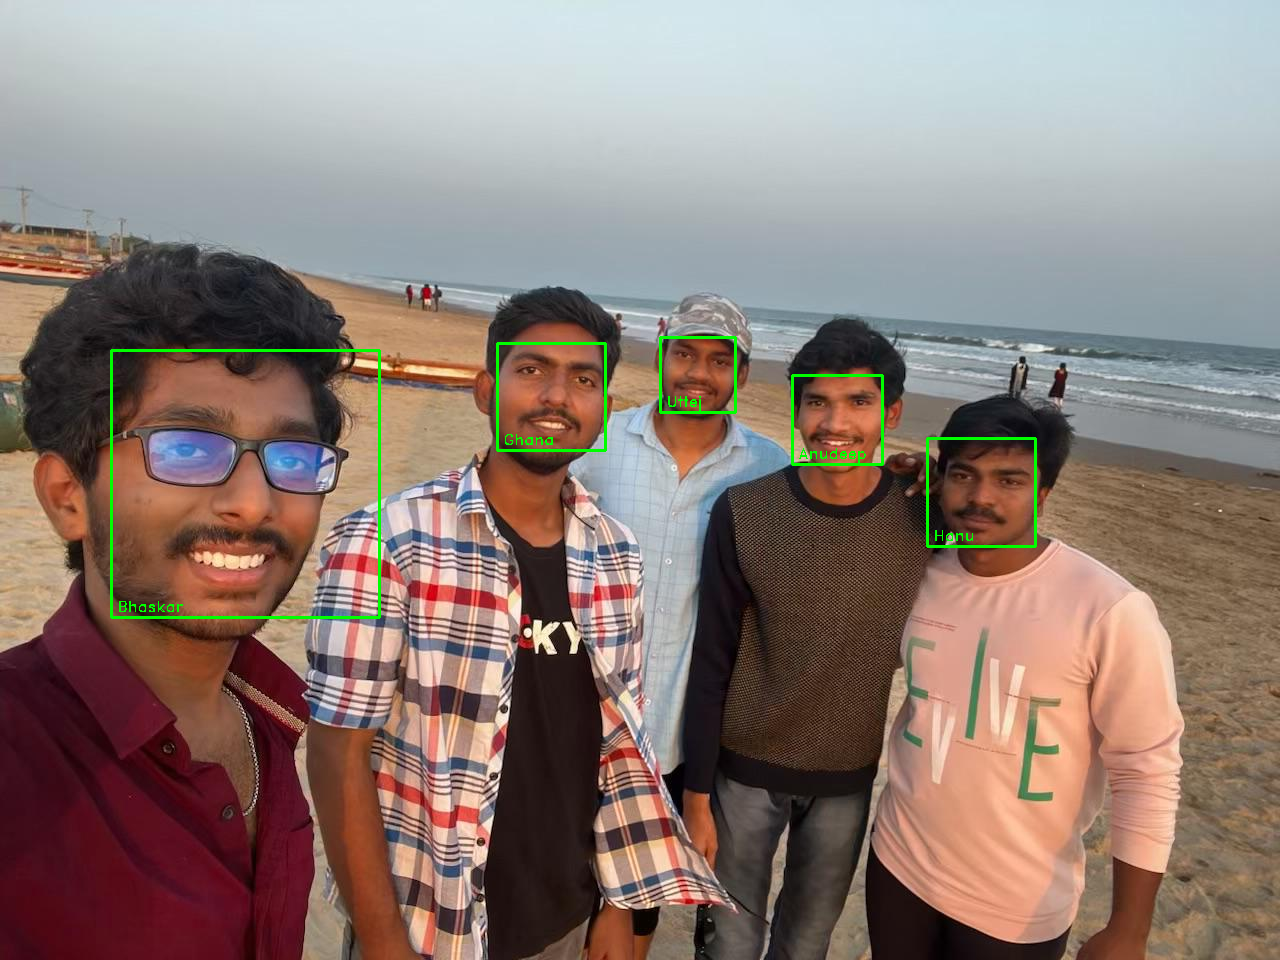

In [15]:
import cv2
import numpy as np
import face_recognition
import pickle
from google.colab.patches import cv2_imshow

# Initialize the Face Recognition Database
face_encodings_db = {}
face_id_counter = 1

# Function to add a face to the database
def add_face(image, name):
    global face_id_counter
    face_encodings = face_recognition.face_encodings(image)
    if face_encodings:
        face_encodings_db[face_id_counter] = {'encoding': face_encodings[0], 'name': name}
        face_id_counter += 1

# Function to recognize faces in an image
def recognize_faces(image):
    face_locations = face_recognition.face_locations(image)
    face_encodings = face_recognition.face_encodings(image, face_locations)
    recognized_faces = []

    for face_encoding in face_encodings:
        matches = face_recognition.compare_faces([entry['encoding'] for entry in face_encodings_db.values()], face_encoding)
        name = "Unknown"

        face_distances = face_recognition.face_distance([entry['encoding'] for entry in face_encodings_db.values()], face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = face_encodings_db[best_match_index + 1]['name']

        recognized_faces.append(name)

    return recognized_faces, face_locations

# Function to draw face detections
def draw_face_detections(image, faces, locations):
    for (top, right, bottom, left), name in zip(locations, faces):
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(image, name, (left + 6, bottom - 6), cv2.FONT_HERSHEY_DUPLEX, 0.5, (0, 255, 0), 1)

# Main script
if __name__ == "__main__":
    # Load images with faces to register
    images_to_register = [
        ('/content/PHOTO-2024-07-04-11-56-55 3.jpg', "Hanu"),
        # Add more images of different people with their names here
        ('/content/anudeep.jpg', "Anudeep"),
        ('/content/uttej.jpg', "Uttej"),
        ('/content/Ghana.jpg', "Ghana"),
        ('/content/bhaskar.jpg', "Bhaskar")
        # Add more images of Hanu for better accuracy
        #('/content/PHOTO-2024-07-04-11-56-55 2.jpg', "Hanu"),
    ]

    for image_path, name in images_to_register:
        image_to_register = cv2.imread(image_path)
        if image_to_register is not None:
            add_face(image_to_register, name)
        else:
            print(f"Failed to load image: {image_path}")

    # Load another image to recognize faces
    image_to_recognize = cv2.imread('/content/PHOTO-2024-07-04-11-56-55.jpg')
    recognized_faces, face_locations = recognize_faces(image_to_recognize)

    # Draw the face detections on the image
    draw_face_detections(image_to_recognize, recognized_faces, face_locations)

    # Display the result
    cv2_imshow(image_to_recognize)

    # Save the face encodings database
    with open('face_encodings_db.pkl', 'wb') as f:
        pickle.dump(face_encodings_db, f)
